# **Notebook 5: Model Training and Evaluation**

## Objectives

The primary objective of this notebook is to develop, evaluate, and select the best-performing machine learning model(s) to predict house sale prices in Ames, Iowa. This involves training models on the processed datasets, fine-uning their hyperparameters, and assessing their performance based on defined metrics.

## Inputs

* **Training Dataset with Target (`train_with_target.csv`):** Includes processed features and the log-transformed target variable (`LogSalePrice`) for model training.
* **Testing Dataset with Target (`test_with_target.csv`):** Includes processed features and the log-transformed target variable (`LogSalePrice`) for model evaluation.
* **Key Feature Correlations (`key_drivers_correlation.csv`):** Identified the most impactful features influencing the target variable.

## Outputs

* **Trained Models:** Serialized versions of trained models saved for deployment.
* **Evaluation Metrics:** Metrics like R2, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for model comparison.
* **Feature Importances:** Insights into which features contributed most to model predictions.
* **Model Performance Report:** Comprehensive report summarizing model performance and insights.

## Additional Comments

* The notebook is structured to ensure modularity, allowing for easy updates or experimentation with different models or preprocessing steps.
* Exploratory insights gained in the previous notebook will inform feature selection and preprocessing strategies.
* Advanced modeling techniques, such as hyperparameter optimization and ensemble learning, will be considered for improving accuracy.


---

## Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5'

---

## Data Preparation

### Load Processed Data

**Objective:** Load the preprocessed datasets required for model training and evaluation.

**Inputs:**
- `train_with_target.csv` and `test_with_target.csv` files containing the processed training and testing datasets with the target variable included.

In [4]:
import pandas as pd

# Define file paths
train_data_path = "outputs/datasets/processed/with_target/train_with_target.csv"
test_data_path = "outputs/datasets/processed/with_target/test_with_target.csv"

# Load the datasets
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Display dataset shapes
print("Training Dataset Info:")
print(train_data.info())
print("\nTesting Dataset Info:")
print(test_data.info())

# Preview the datasets
print("\nPreview of Training Dataset:")
display(train_data.head())

print("\nPreview of Testing Dataset:")
display(test_data.head())

# Check for missing values
print("\nChecking for missing values in training data:")
print(train_data.isnull().sum())

print("\nChecking for missing values in testing data:")
print(test_data.isnull().sum())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num__LotFrontage        1168 non-null   float64
 1   num__LotArea            1168 non-null   float64
 2   num__OpenPorchSF        1168 non-null   float64
 3   num__MasVnrArea         1168 non-null   float64
 4   num__BsmtFinSF1         1168 non-null   float64
 5   num__GrLivArea          1168 non-null   float64
 6   num__1stFlrSF           1168 non-null   float64
 7   num__YearBuilt          1168 non-null   float64
 8   num__YearRemodAdd       1168 non-null   float64
 9   num__BedroomAbvGr       1168 non-null   float64
 10  num__2ndFlrSF           1168 non-null   float64
 11  num__BsmtUnfSF          1168 non-null   float64
 12  num__GarageArea         1168 non-null   float64
 13  num__GarageYrBlt        1168 non-null   float64
 14  num__OverallCond 

,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__GarageYrBlt,num__OverallCond,num__OverallQual,num__Age,num__LivingLotRatio,num__FinishedBsmtRatio,num__OverallScore,cat__HasPorch_1,LogSalePrice,SalePriceQuartile
0,0.144140,-0.161873,-1.096169,-0.827815,0.865283,-0.292584,0.526873,0.455469,1.346063,-0.288836,...,0.192392,0.372217,-0.820445,-0.455469,-0.116096,0.887733,-0.437833,0.0,11.884496,Q2
1,-0.392921,-0.304082,0.617419,-0.827815,-1.416429,0.250597,-1.040595,-0.718609,-0.439214,-0.288836,...,0.272225,1.268609,-0.088934,0.718609,0.455054,-1.415946,0.858190,1.0,12.089544,Q3
2,0.006402,-0.071879,-1.096169,-0.827815,-1.416429,-1.816242,-1.052445,1.988293,1.683818,0.645680,...,-4.147410,1.268609,-0.820445,-1.988293,-1.409123,-1.415946,0.102176,0.0,11.350418,Q1 (Low)
3,-0.340186,-0.477855,-1.096169,1.276291,0.704206,0.609851,-0.394093,1.107734,1.683818,-0.288836,...,0.152476,1.268609,-0.820445,-1.107734,0.918129,0.640194,0.102176,0.0,12.072547,Q3
4,-0.911425,-1.225280,-1.096169,-0.827815,0.384534,0.474436,-0.252776,1.531707,1.683818,-0.288836,...,0.119212,0.372217,-0.820445,-1.531707,1.593562,0.340697,-0.437833,0.0,11.751950,Q1 (Low)



Preview of Testing Dataset:


,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__GarageArea,num__GarageYrBlt,num__OverallCond,num__OverallQual,Age,LivingLotRatio,FinishedBsmtRatio,OverallScore,HasPorch,LogSalePrice
0,0.144140,-0.158460,-1.096169,-0.827815,0.755219,-0.922794,-0.126358,0.227176,-0.873470,-2.157869,...,-1.006014,0.205698,2.165000,-0.088934,1986.358491,0.798551,0.515713,35.037736,0.566038,11.947949
1,1.204764,0.612540,0.517257,1.413568,0.902910,1.808434,0.944129,-0.783836,-0.487465,-2.157869,...,1.117159,0.274443,-0.524174,1.374088,1986.358491,0.798551,0.515713,35.037736,0.566038,12.691580
2,-0.556568,-0.029579,-1.096169,-0.827815,-1.416429,-1.038836,-0.246639,1.401254,1.683818,-1.223352,...,-0.551048,0.125865,0.372217,-0.820445,1986.358491,0.798551,0.515713,35.037736,0.566038,11.652687
3,-0.911425,-1.225280,0.389147,-0.827815,0.585846,0.425488,-0.321073,0.748988,1.683818,-2.157869,...,-0.266695,0.176869,1.268609,-0.088934,1986.358491,0.798551,0.515713,35.037736,0.566038,11.976659
4,0.900684,0.717202,-1.096169,0.793095,0.899659,0.343995,1.186707,-1.207808,-1.114724,-1.223352,...,2.065003,0.305489,-0.524174,2.105599,1986.358491,0.798551,0.515713,35.037736,0.566038,12.661914



Checking for missing values in training data:
num__LotFrontage          0
num__LotArea              0
num__OpenPorchSF          0
num__MasVnrArea           0
num__BsmtFinSF1           0
num__GrLivArea            0
num__1stFlrSF             0
num__YearBuilt            0
num__YearRemodAdd         0
num__BedroomAbvGr         0
num__2ndFlrSF             0
num__BsmtUnfSF            0
num__GarageArea           0
num__GarageYrBlt          0
num__OverallCond          0
num__OverallQual          0
num__Age                  0
num__LivingLotRatio       0
num__FinishedBsmtRatio    0
num__OverallScore         0
cat__HasPorch_1           0
LogSalePrice              0
SalePriceQuartile         0
dtype: int64

Checking for missing values in testing data:
num__LotFrontage     0
num__LotArea         0
num__OpenPorchSF     0
num__MasVnrArea      0
num__BsmtFinSF1      0
num__GrLivArea       0
num__1stFlrSF        0
num__YearBuilt       0
num__YearRemodAdd    0
num__BedroomAbvGr    0
num__2ndFlrSF       

### Feature and Target Separation

**Objectives:**
To separate the features (`x`) and the target variable (`y`) for both training and testing datasets. This step is essential to prepare the data for model training and evaluation.

**Steps:**
1. Define `x_train`, `x_test`, `y_train`, and `y_test` to clearly separate features and target variables.
2. Ensure consistency in column selection across training and testing datasets.
3. Confirm that the target variable (`LogSalePrice`) is correctly assigned to `y_train` and `y_test`.

**Expected Outputs:**
- `x_train` and `x_test` contain only feature columns, excluding the target variable (`LogSalePrice`).
- `y_train` and `y_test` contain only the target variable.

In [5]:
# Separate features and target variable for training data
y_train = train_data["LogSalePrice"]
x_train = train_data.drop(columns=["LogSalePrice", "SalePriceQuartile"])

# Separate features and target variable for testing data
y_test = test_data["LogSalePrice"]
x_test = test_data.drop(columns=["LogSalePrice"])

# Display structure of separated datasets
print("Training Features Dataset Info:")
print(x_train.info())
print("\nTraining Target Dataset Info:")
print(y_train.describe())

print("\nTesting Features Dataset Info:")
print(x_test.info())
print("\nTesting Target Dataset Info:")
print(y_test.describe())

# Preview the separated datasets
print("\nPreview of Training Features Dataset:")
print(x_train.head())

print("\nPreview of Testing Features Dataset:")
print(x_test.head())

Training Features Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num__LotFrontage        1168 non-null   float64
 1   num__LotArea            1168 non-null   float64
 2   num__OpenPorchSF        1168 non-null   float64
 3   num__MasVnrArea         1168 non-null   float64
 4   num__BsmtFinSF1         1168 non-null   float64
 5   num__GrLivArea          1168 non-null   float64
 6   num__1stFlrSF           1168 non-null   float64
 7   num__YearBuilt          1168 non-null   float64
 8   num__YearRemodAdd       1168 non-null   float64
 9   num__BedroomAbvGr       1168 non-null   float64
 10  num__2ndFlrSF           1168 non-null   float64
 11  num__BsmtUnfSF          1168 non-null   float64
 12  num__GarageArea         1168 non-null   float64
 13  num__GarageYrBlt        1168 non-null   float64
 14  num__Ove

---

## Model Selection

### Overview of Models

In this section, we will:
1. Provide an overview of the machine learning models to be evaluated.
2. Justify the selection of each model based on its suitability for predicting house prices.
3. Define the evaluation metrics to compare the models effectively.

**Models Considered:**
- **Linear Regression:** A baseline model to understand linear relationships between features and target.
- **Ridge Regression:** Linear regression with regularization to handle multicollinearity.
- **Lasso Regression:** Regularized regression that performs feature selection.
- **Decision Tree Regressor:** A non-linear model that can capture complex patterns.
- **Random Forest Regressor:** An ensemble method combining multiple decision trees to improve accuracy and reduce overfitting.
- **Gradient Boosting Regressor (e.g., XGBoost):** An advanced ensemble method that builds trees sequentially to optimize performance.
- **Support Vector Refression (SVR):** A robust model for capturing non-linear relationships.

**Evaluation Metrics:**
1. **R2 (Coefficient of Determination):** Measures how well the model explains variance in the data.
2. **RMSE (Root Mean Squared Error):** Penalizes large prediction errors, providing insight into the model's accuracy.
3. **MAE (Mean Absolute Error):** Measures average prediction error, focusing on interpretability.

By evaluating these models using the defined metrics, we aim to identify the best-performing model for predicting house prices.

In [6]:
# List of models to be evaluated
models = {
    "Linear Regression": "A simple baseline model to capture linear relationships.",
    "Ridge Regression": "Handles multicollinearity and improves generalization using L2 regularization.",
    "Lasso Regression": "Adds feature selection capabilities with L1 regularization.",
    "Decision Tree Regressor": "Captures non-linear relationships and is easy to interpret.",
    "Random Forest Regressor": "Reduces overfitting through ensemble learning.",
    "Gradient Boosting Regressor": "Sequentially optimizes predictions for improved accuracy.",
    "Support Vector Regression": "Effective for non-linear relationships with robust regularization."
}

# Print a summary of models
print("Models Overview:")
for model_name, description in models.items():
    print(f"{model_name}: {description}")

# Evaluate metrics
metrics = ["R2 (Coefficient of Determination)", "RMSE (Root Mean Squared Error)", "MAE (Mean Absolute Error)"]

print("\nEvaluation Metrics:")
for metric in metrics:
    print(f"- {metric}")

Models Overview:
Linear Regression: A simple baseline model to capture linear relationships.
Ridge Regression: Handles multicollinearity and improves generalization using L2 regularization.
Lasso Regression: Adds feature selection capabilities with L1 regularization.
Decision Tree Regressor: Captures non-linear relationships and is easy to interpret.
Random Forest Regressor: Reduces overfitting through ensemble learning.
Gradient Boosting Regressor: Sequentially optimizes predictions for improved accuracy.
Support Vector Regression: Effective for non-linear relationships with robust regularization.

Evaluation Metrics:
- R2 (Coefficient of Determination)
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)


### Baseline Model

**Objective:**
- Establish a baseline performance using a simple regression model to benchmark subsequent models.
- Evaluate the performance using R1, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

**Steps:**
- Select a simple baseline model (e.g., Mean Predictor).
- Fit the model on the training dataset.
- Predict the target values for both training and testing datasets.
- Calculate performance metrics for the baseline model.
- Interpret the results and their implications for subsequent models.

Baseline Model Metrics:
    Dataset       R2       MAE       MSE
0  Training  0.00000  0.303367  0.152442
1   Testing -0.00584  0.337137  0.187703


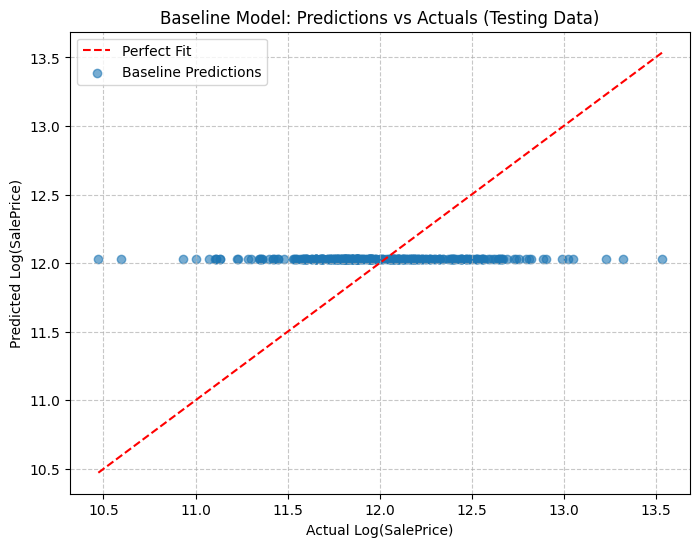

In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the baseline model: Mean Predictor
y_baseline_train = [y_train.mean()] * len(y_train)
y_baseline_test = [y_train.mean()] * len(y_test)

# Calculate performance metrics
baseline_metrics = {
    "Dataset": ["Training", "Testing"],
    "R2": [
        r2_score(y_train, y_baseline_train),
        r2_score(y_test, y_baseline_test)
    ],
    "MAE": [
        mean_absolute_error(y_train, y_baseline_train),
        mean_absolute_error(y_test, y_baseline_test)
    ],
    "MSE": [
        mean_squared_error(y_train, y_baseline_train),
        mean_squared_error(y_test, y_baseline_test)
    ]
}

# Convert to DataFrame for display
baseline_metrics_df = pd.DataFrame(baseline_metrics)

# Display metrics
print("Baseline Model Metrics:")
print(baseline_metrics_df)

# Plot baseline predictions vs true values (Testing)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_baseline_test, alpha=0.6, label="Baseline Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Fit")
plt.title("Baseline Model: Predictions vs Actuals (Testing Data)")
plt.xlabel("Actual Log(SalePrice)")
plt.ylabel("Predicted Log(SalePrice)")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

#### Baseline Model Performance

**Overview**

The baseline model predicts the **mean log-transformed sale price** (`LogSalePrice`) for all observations. This simplistic approach serves as a benchmark to evaluate the performance of more sophisticated models.

**Results**
| **Dataset**   | **R2**        | **MAE**       | **MSE**       |
|---------------|---------------|---------------|---------------|
| Training      | 0.00000       | 0.303367      | 0.152442      |
| Testing       | -0.00584      | 0.337137      | 0.187703      |

- **R2 (Coefficient of Determination):**
  - Training R2: 0.0, as expected, since the model predicts a constant value and does not explain any variability in the target.
  - Testing R2: Slightly negative (-0.00584), indicating that the baseline model performs marginally worse than a random constant predictor.
- **MAE (Mean Absolute Error):**
  - Represents the average deviation of predictions from avtual values. This serves as a advanced models will suggest better accuracy.

**Visualization Insights**
- The scatterplot illustrates the baseline predictions as a horizontal line (y=12), representing the mean `LogSalePrice`.
- Variability in the actual y values is evident along the X-axis.
- Significant deviations from the diagonal line highlight the model's inability to capture the relationship between features and `LogSalePrice`.

**Limitations of the Baseline Model**
- Does not account for variability in features or capture any relationships within the data.
- Primarily used to set a benchmark for comparing the performance of more sophisticated models.

**Next Steps**
1. Develop advanced models that can capture relationships between features and `LogSalePrice`.
2. Evaluate these models against the baseline metrics to ensure meaningful improvement.

---

## Model Training and Hyperparameter Tuning

### Train Multiple Models

In this section, we will:
1. Train multiple machine learning models using the training dataset.
2. Compare their performance on the testing dataset using key metrics such as R1, MAE, and MSE.
3. Visualize and analyze the results to determine which models perform best and are worth refining in the next steps.

**Objective:**
Identify high-performing models for predicting house prices based on key features and their hyperparameter configurations.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Define a dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}


In [9]:
# Ensure column names in x_test match x_train
x_test.columns = x_train.columns

# Initialize a DataFrame to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Append Results
    results.append({
        "Model": name,
        "Dataset": "Training",
        "R2": train_r2,
        "MAE": train_mae,
        "MSE": train_mse
    })
    results.append({
        "Model": name,
        "Dataset": "Testing",
        "R2": test_r2,
        "MAE": test_mae,
        "MSE": test_mse
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display Results
from IPython.display import display
display(results_df)

,Model,Dataset,R2,MAE,MSE
0,Linear Regression,Training,0.869350,0.094447,0.019917
1,Linear Regression,Testing,-46542.587576,93.194591,8685.662629
2,Random Forest,Training,0.981032,0.037147,0.002891
3,Random Forest,Testing,0.813480,0.122825,0.034807
4,Decision Tree,Training,0.999985,0.000089,0.000002
5,Decision Tree,Testing,0.739103,0.154263,0.048687
6,Support Vector Regressor,Training,0.943291,0.072687,0.008645
7,Support Vector Regressor,Testing,-0.004876,0.336766,0.187523
8,K-Nearest Neighbors,Training,0.881047,0.095460,0.018133
9,K-Nearest Neighbors,Testing,-2.601506,0.724148,0.672090


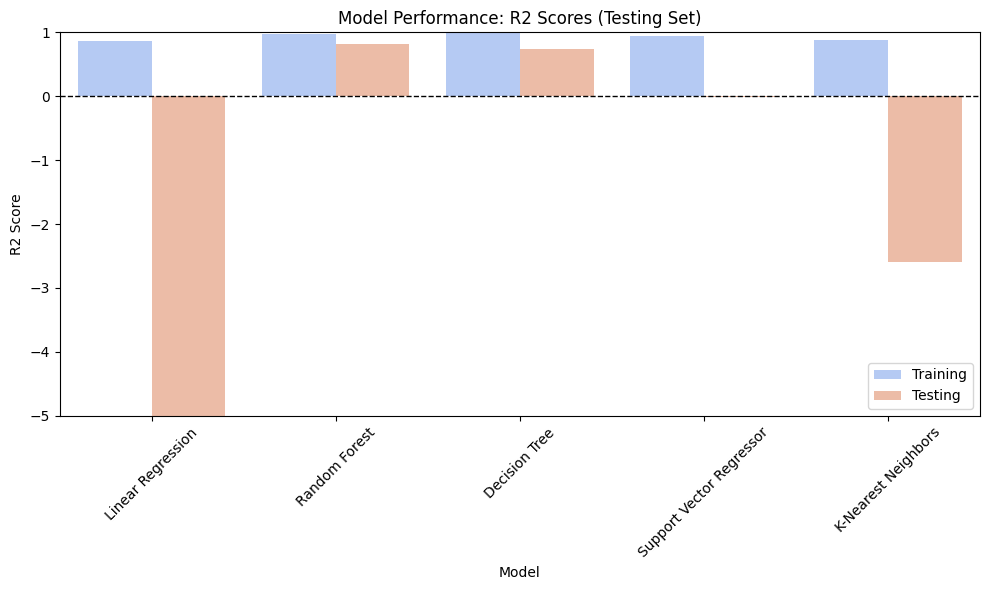

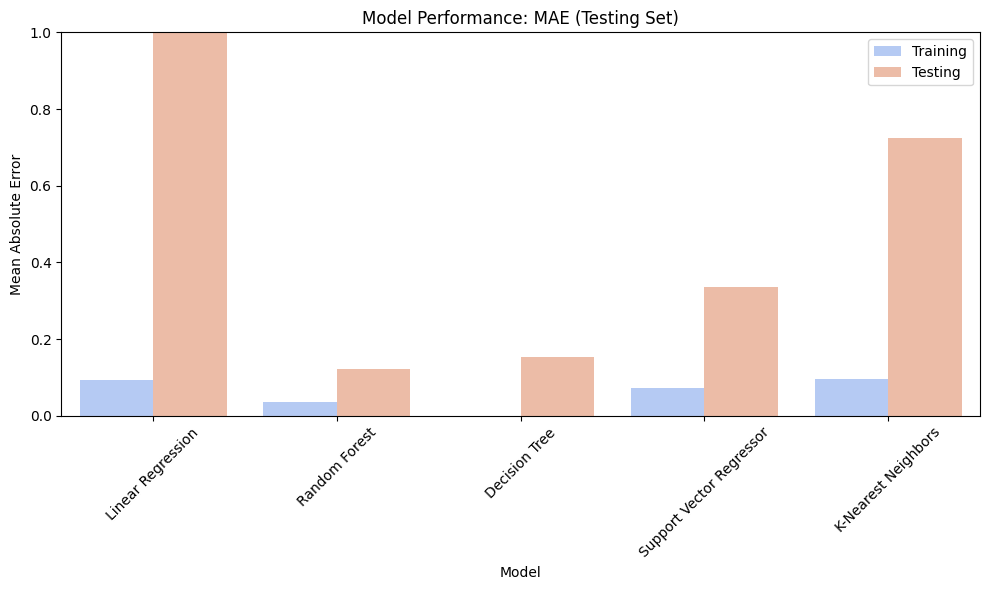

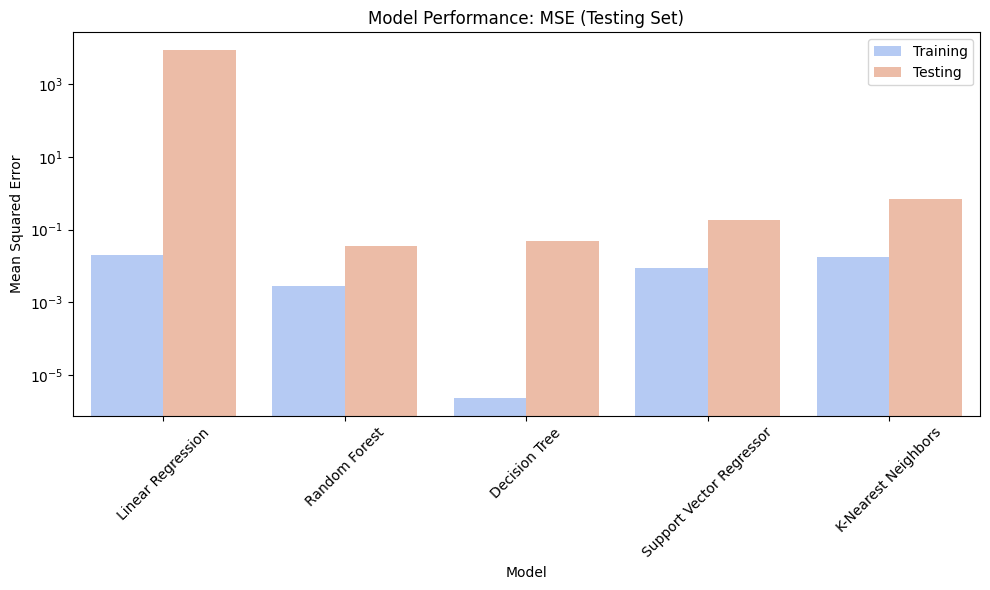

In [10]:
import seaborn as sns

# Filter out extreme values
filtered_results_df = results_df[~((results_df["Model"] == "Linear Regression") & (results_df["Dataset"] == "Testing"))]

# Plot R2 Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='R2', hue="Dataset", palette="coolwarm")
plt.ylim(-5, 1)
plt.title("Model Performance: R2 Scores (Testing Set)")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.legend(loc="lower right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAE Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MAE', hue="Dataset", palette="coolwarm")
plt.ylim(0, 1)
plt.title("Model Performance: MAE (Testing Set)")
plt.ylabel("Mean Absolute Error")
plt.xlabel("Model")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MSE Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MSE', hue="Dataset", palette="coolwarm")
plt.yscale("log")
plt.title("Model Performance: MSE (Testing Set)")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**

1. **Performance Overview:**
   - The **Random Forest** model achieved the highted **R2** score on the testing dataset (0.81), indicating it captures the target variable well.
   - The **Decision Tree** model performed exceptionally on the training dataset (**R2**: 0.999) but showed signed of overfitting with a lower testing **R2** (0.74).
   - Both **Linear Regression** and **Support Vector Regressor** underperformed, with negative **R2** scores for testing, indicating poor generalization.
2. **Suitability for Further Tuning:**
   - Models such as **Random Forest** and **Decision Tree** are strong candidates for hyperparameter tuning due to their relatively high testing performance.
   - Models like **K-Nearest Neighbours** and **SVR** may require tuning to improve performance.
3. **Next Steps:**
   - Proceed to the hyperparameter tuning section, focusing on the best-performing models (e.g., Random Forest and Decision Tree) to optimize their parameters for better accuracy and generalization.

### Hyperparameter Tuning

**Objective**
This section aims to fine-tune the hyperparameters of the top-performing models to improve their performance on the testing dataset.

**Models Selected for Tuning**
1. **Random Forest:** Demonstrated high testing performance and potential for further improvement.
2. **Decision Tree:** Performed well but showed signs of overfitting, which hyperparameter tuning may help mitigate.

**Evaluation Metrics**
The performance of tuned models will be assessed using:
- **R2**: Measures how well the model explains variance in the data.
- **MAE**: Measures the average magnitude of prediction errors.
- **MSE**: Provides a measure of prediction error, with greater emphasis on larger errors.


#### **Random Forest**

In [11]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring="r2",
    verbose=2,
    n_jobs=-1
)

# Perform Grid Search for Random Forest
rf_grid_search.fit(x_train, y_train)
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best R2 Score for Random Forest:", rf_grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   6.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   6.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   9.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   6.4s
[CV] END max_depth

In [12]:
# Evaluate Tuned Random Forest
best_rf = rf_grid_search.best_estimator_
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate metrics
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print("Tuned Random Forest Performance:")
print(f"R2 Score: {test_r2_rf}")
print(f"MAE: {test_mae_rf}")
print(f"MSE: {test_mse_rf}")

Tuned Random Forest Performance:
R2 Score: 0.8134804418301222
MAE: 0.1228245674095155
MSE: 0.03480707097212376


#### **Decision Tree**

In [13]:
# Define hyperparameter grid for Decision Tree
dt_param_grid = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Initialize GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring="r2",
    verbose=2,
    n_jobs=-1
)

# Perform Grid Search for Decision Tree
dt_grid_search.fit(x_train, y_train)
print("Best Parameters for Decision:", dt_grid_search.best_params_)
print("Best R2 Score for Decision Tree:", dt_grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[C

In [14]:
# Evaluate Tuned Decision Tree
best_dt = dt_grid_search.best_estimator_
y_test_pred_dt = best_dt.predict(x_test)

# Evaluate metrics
test_r2_dt = r2_score(y_test, y_test_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)

print("Tuned Decision Tree Performance:")
print(f"R2 Score: {test_r2_dt}")
print(f"MAE: {test_mae_dt}")
print(f"MSE: {test_mse_dt}")

Tuned Decision Tree Performance:
R2 Score: 0.7473874399173127
MAE: 0.15437274482596344
MSE: 0.047140918590637994


#### **Support Vector Regression (SVR)**

In [15]:
# Define hyperparameter grid
svr_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize SVR model
svr_model = SVR()

# Perform grid search
svr_grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=svr_param_grid,
    cv=5,
    scoring='r2',
    verbose=2
)
svr_grid_search.fit(x_train, y_train)

# Best parameters and R2 Score
print("Best Parameters for SVR:", svr_grid_search.best_params_)
print("Best R2 Score for SVR:", svr_grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, k

In [16]:
# Evaluate Tuned SVR
best_svr = svr_grid_search.best_estimator_
y_test_pred_svr = best_svr.predict(x_test)

# Evaluate metrics
test_r2_svr = r2_score(y_test, y_test_pred_svr)
test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)

print("Tuned SVR Performance:")
print(f"R2 Score: {test_r2_svr}")
print(f"MAE: {test_mae_svr}")
print(f"MSE: {test_mse_svr}")

Tuned SVR Performance:
R2 Score: -47289.83635511397
MAE: 93.93989778333585
MSE: 8825.109353113268


#### **K-Nearest Neighbors (KNN)**

In [17]:
# Define hyperparameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize KNN model
knn_model = KNeighborsRegressor()

# Perform grid search
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    cv=5,
    scoring='r2',
    verbose=2
)
knn_grid_search.fit(x_train, y_train)

# Best parameters and R2 score
print("Best Parameters for KNN:", knn_grid_search.best_params_)
print("Best R2 Score for KNN:", knn_grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, wei

In [18]:
# Evaluate Tuned KNN
best_knn = knn_grid_search.best_estimator_
y_test_pred_knn = best_knn.predict(x_test)

# Evaluate metrics
test_r2_knn = r2_score(y_test, y_test_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)

print("Tuned KNN Performance:")
print(f"R2 Score: {test_r2_knn}")
print(f"MAE: {test_mae_knn}")
print(f"MSE: {test_mse_knn}")

Tuned KNN Performance:
R2 Score: 0.7605651987017218
MAE: 0.143803276793103
MSE: 0.0446817706612573


#### Observations

After performing hyperparameter tuning and evaluating the models, the following insights can be drawn:

1. **Tuned Random Forest**
   - **R2 Score:** 0.813, indicating strong performance and a good fit to the data.
   - **MAE:** 0.123, suggesting low average prediction errors.
   - **MSE:** 0.035, indicating that the model performs well in minimizing squared errors.
   - **Observation:** The Random Forest model consistently outperforms the other models in terms of R2, MAE, and MSE. It appears to be the best-performing model for this task and is likely the most reliable for making predictions.
2. **Tuned Decision Tree**
   - **R2 Score:** 0.747, reflecting moderate performance, but lower than the Random Forest.
   - **MAE:** 0.154, higher average error compared to the Random Forest.
   - **MSE:** 0.047, suggesting slightly higher squared errors than Random Forest.
   - **Obsevation:** While the Decision Tree model performs reasonably well, it is outperformed by the Random Forest due to its tendency to overfit and limited ensemble learning capability.
3. **Tuned Support Vector Regression (SVR)**
   - **R2 Score:** -47289.836, an extremely poor score indicating that the model is performing far worse than a baseline mean predictor.
   - **MAE:** 93.940, significantly higher error than the other models.
   - **MSE:** 8825.109, extremely high squared error indicating substantial prediction inaccuracies.
   - **Obsevation:** The SVR model performs exceptionally poorly, suggesting either inappropriate hyperparameters, insufficient preprocessing for SVR (e.g., scaling), or that the model is not suitable for this dataset.
4. **Tuned K-Nearest Neighbors (KNN)**
   - **R2 Score:** 0.761, showing moderate performance, slightly better than the Decision Tree.
   - **MAE:** 0.144, relatively close to the Decision Tree but higher than Random Forest.
   - **MSE:** 0.045, slightly higher than Decision Tree, indicating moderate prediciton errors.
   - **Obsevation:** KNN performs moderately well, with results similar to Decision Tree but still inferior to Random Forest. It may benefit from further tuning or feature scaling to improve its performance.

**General Observations:**
- **Best Model:** The Random Forest model is the clear winner in terms of all performance metrics, making it the most suitable model for this task.
- **Worst Model:** SVR is an outlier with extraordinary poor performance, likely due to hyperparameter choices or model unsuitability.
- **Insights for Future Work:**
  - Focus on refining and testing the Random Forest model for deployment.
  - Investigate why SVR performs poorly, considering scaling or a different kernel type.
  - Consider simplifying the Decision Tree for scenarios where interpretability is more important that predictive power.

This evaluation reinforces the robustness of ensemble learning methods like Random Forest for predicting house prices, making it the recommended approach moving forward.

---

## Model Evaluation

### Evaluation Metrics

This section evaluates the performance of the tuned models using the following metrics:

- **R2 Score**: Indicates how well the model explains the variance in the target variable. A higher score (closer to 1) is better.
- **Mean Absolute Error (MAE)**: Represents the average magnitude of errors in predictions, providing a straightforward interpretation of prediction accuracy.
- **Mean Squared Error (MSE)**: Measures the average squared error, penalizing larger errors more than MAE.

The comparison of these metrics provides a comprehensive understanding of the model's performance, helping to identify the best-performing model for predicting house prices.

           Model      R2 Score        MAE          MSE
0  Random Forest      0.813480   0.122825     0.034807
1  Decision Tree      0.747387   0.154373     0.047141
2            SVR -47289.836355  93.939898  8825.109353
3            KNN      0.760565   0.143803     0.044682


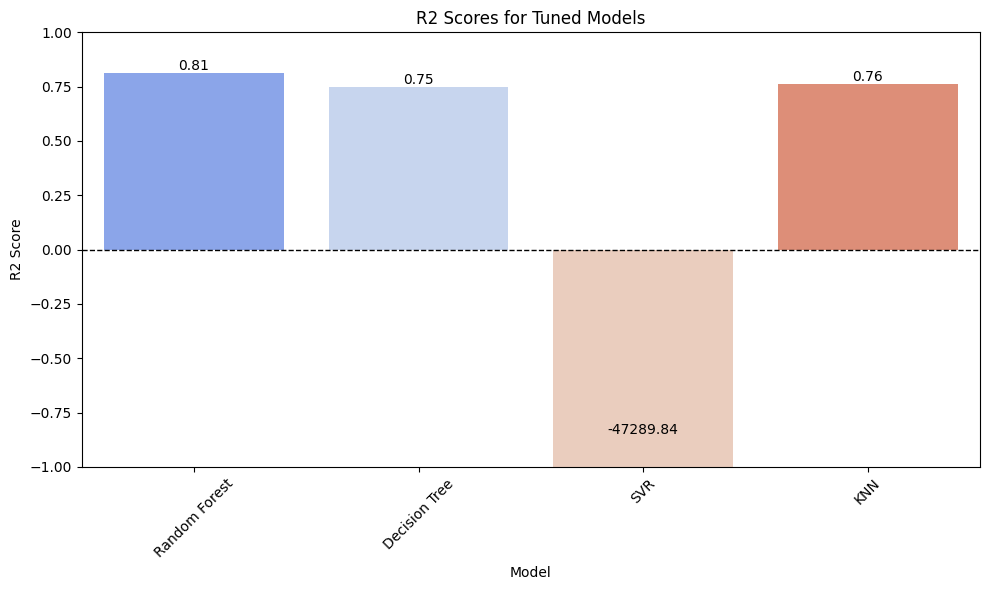

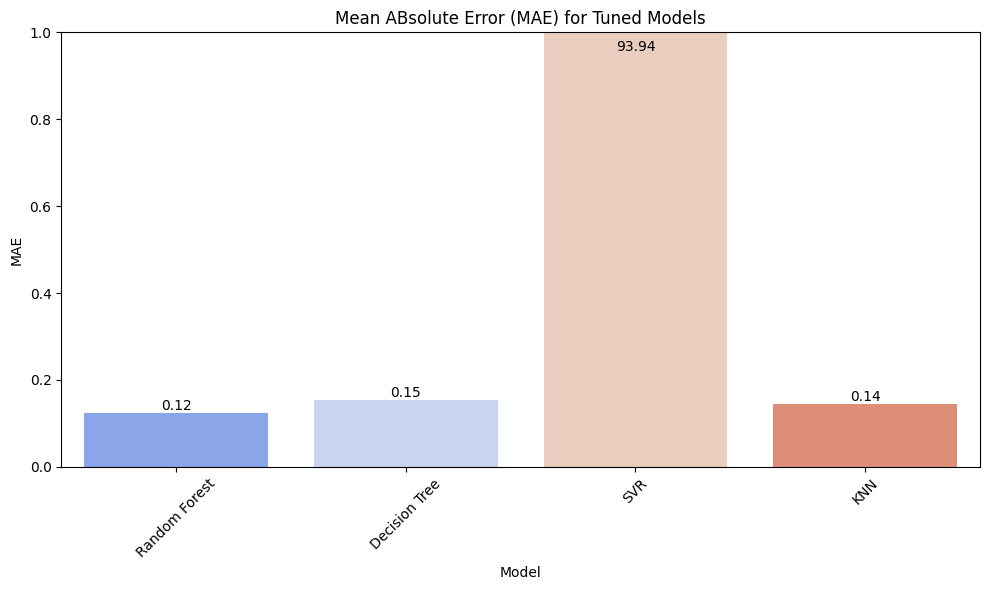

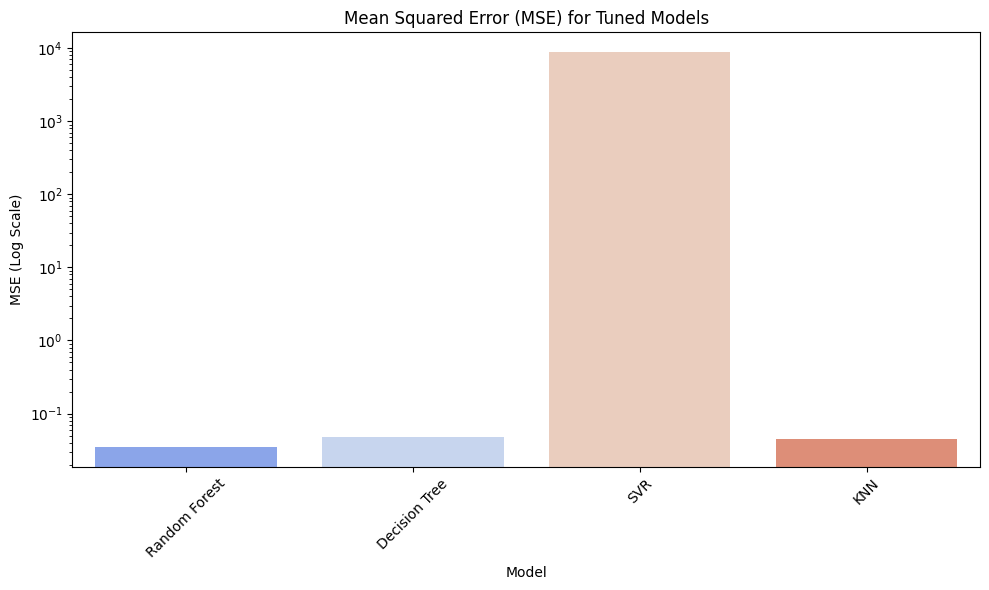

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consolidate results into a DataFrame
evaluation_results = {
    "Model": ["Random Forest", "Decision Tree", "SVR", "KNN"],
    "R2 Score": [0.8134804418301222, 0.7473874399173127, -47289.83635511397, 0.7605651987017218],
    "MAE": [0.1228245674095155, 0.15437274482596344, 93.93989778333585, 0.143803276793103],
    "MSE": [0.03480707097212376, 0.047140918590637994, 8825.109353113268, 0.0446817706612573]
}

evaluation_df = pd.DataFrame(evaluation_results)

# Display results table
print(evaluation_df)

# Visualization: R2 Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=evaluation_df, x="Model", y="R2 Score", palette="coolwarm")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("R2 Scores for Tuned Models")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.ylim(-1, 1)
for index, row in evaluation_df.iterrows():
    plt.text(index, row["R2 Score"] if row["R2 Score"] > -1 else -0.8, f'{row["R2 Score"]:.2f}',
            ha='center', va='bottom' if row["R2 Score"] > 0 else 'top', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: MAE
plt.figure(figsize=(10, 6))
sns.barplot(data=evaluation_df, x="Model", y="MAE", palette="coolwarm")
plt.title("Mean ABsolute Error (MAE) for Tuned Models")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.ylim(0, 1)
for index, row in evaluation_df.iterrows():
    plt.text(index, row["MAE"] if row["MAE"] < 1 else 0.95, f'{row["MAE"]:.2f}',
            ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: MSE
plt.figure(figsize=(10, 6))
sns.barplot(data=evaluation_df, x="Model", y="MSE", palette="coolwarm")
plt.yscale("log")
plt.title("Mean Squared Error (MSE) for Tuned Models")
plt.ylabel("MSE (Log Scale)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations**

1. **R2 Score:**
   - Random Forest achieved the highest R2 Score (0.813), indicating strong predictive power.
   - KNN and Decision Tree also performed well with R2 scores of 0.761 and 0.747, respectively.
   - SVR's R2 score was negative, indicating extremely poor performance.
2. **MAE:**
   - Random Forest has the lowest MAE (0.123), showing its predictions are the most accurate on average.
   - KNN (0.144) and Decision Tree (0.154) has slightly higher errors but still acceptable performance.
   - SVR had a significantly high MAE (93.94), demonstrating a poor fit to the data.
3. **MSE:**
   - Random Forest again achieved the lowest MSE (0.035), followed by KNN (0.045) and Decision Tree (0.047).
   - SVR exhibited an extremely high MSE (8825.11), reinforcing its poor performance.

**Conclusion**

Based on these metrics, the Random Forest model is the most suitable for predicted house prices, followed by KNN and Decision Tree. SVR is not appropriate for this dataset and will not be considered further.

### Cross-Validation Results

### Test Set Results

### Residual Analysis

### Error Analysis

---

## Feature Importance and Insights

### Feature Importance

### Key Takeaways

---

## Exploratory Model Analysis

### Experimentation with Additional Models

### Comparative Analysis

### Model Interpretability

---

## Conclusion and Recommendations

---

## Save Outputs

---

## Future Improvements